In [69]:
##01 . Chuyển về chữ thường

Bước 1: Đọc/ tạo văn bản

In [70]:
import pandas as pd
# Read the CSV file with a different encoding
data = pd.read_csv('news_data.csv', encoding='latin-1')
data = data.dropna()
data.shape

(56651, 5)

In [71]:
data.head()


,Unnamed: 0,Headline,Content,News Categories,Date
0,14,Zareen Khan's lawyer issues statement on arres...,After a Kolkata court issued an arrest warrant...,entertainment,19-09-2023
1,16,"What is Women's Reservation Bill, demanded by ...",At an all-party meeting convened by the govern...,politics,19-09-2023
2,19,No Chinese ambassador in India for nearly a ye...,"By October, the Chinese embassy in India will ...",world,19-09-2023
3,33,IIT Kanpur Director Abhay Karandikar appointed...,IIT Kanpur's Director Abhay Karandikar has bee...,technology,19-09-2023
4,35,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,business,19-09-2023


In [72]:
df = data[['Headline','Content','News Categories','Date']]

In [73]:
df

,Headline,Content,News Categories,Date
0,Zareen Khan's lawyer issues statement on arres...,After a Kolkata court issued an arrest warrant...,entertainment,19-09-2023
1,"What is Women's Reservation Bill, demanded by ...",At an all-party meeting convened by the govern...,politics,19-09-2023
2,No Chinese ambassador in India for nearly a ye...,"By October, the Chinese embassy in India will ...",world,19-09-2023
3,IIT Kanpur Director Abhay Karandikar appointed...,IIT Kanpur's Director Abhay Karandikar has bee...,technology,19-09-2023
4,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,business,19-09-2023
...,...,...,...,...
56646,Man dies after eating 'toxic' shawarma from a ...,A 19-year-old died after eating chicken shawar...,miscellaneous,2024-05-09
56647,What can make a healthy snack as per ICMR?,"The Dietary Guidelines for Indians, unveiled b...",miscellaneous,2024-05-09
56648,Study says your car is exposing you to cancer-...,Most people are breathing in cancer-causing ch...,miscellaneous,2024-05-09
56649,How can shawarma lead to food poisoning as per...,The meat used for shawarma is slow-roasted for...,miscellaneous,2024-05-09


## Loại bỏ Link


In [74]:
import re

def remove_links(text):
    # Biểu thức chính quy để tìm các liên kết trong văn bản
    link_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # Sử dụng hàm sub() của module re để thay thế các liên kết bằng chuỗi rỗng
    text_without_links = re.sub(link_pattern, '', text)
    
    return text_without_links

Bước 2: Chuyển văn bản vào data frame

In [75]:
# df = pd.DataFrame({'content':text})
df

,Headline,Content,News Categories,Date
0,Zareen Khan's lawyer issues statement on arres...,After a Kolkata court issued an arrest warrant...,entertainment,19-09-2023
1,"What is Women's Reservation Bill, demanded by ...",At an all-party meeting convened by the govern...,politics,19-09-2023
2,No Chinese ambassador in India for nearly a ye...,"By October, the Chinese embassy in India will ...",world,19-09-2023
3,IIT Kanpur Director Abhay Karandikar appointed...,IIT Kanpur's Director Abhay Karandikar has bee...,technology,19-09-2023
4,Time stops for you: Mahindra as he praises PM ...,Mahindra Group Chairman Anand Mahindra took to...,business,19-09-2023
...,...,...,...,...
56646,Man dies after eating 'toxic' shawarma from a ...,A 19-year-old died after eating chicken shawar...,miscellaneous,2024-05-09
56647,What can make a healthy snack as per ICMR?,"The Dietary Guidelines for Indians, unveiled b...",miscellaneous,2024-05-09
56648,Study says your car is exposing you to cancer-...,Most people are breathing in cancer-causing ch...,miscellaneous,2024-05-09
56649,How can shawarma lead to food poisoning as per...,The meat used for shawarma is slow-roasted for...,miscellaneous,2024-05-09


In [76]:
df['Content'] = df['Content'].apply(remove_links)
df['Headline'] = df['Headline'].apply(remove_links)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\396232758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'] = df['Content'].apply(remove_links)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\396232758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headline'] = df['Headline'].apply(remove_links)


Bước 3: Thực thi hàm lower

In [77]:
normalized_string = lambda x: " ".join(x.lower() for x in x.split())

In [78]:
df['Content'] = df['Content'].apply(normalized_string)
df['Headline'] = df['Headline'].apply(normalized_string)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\2676401389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'] = df['Content'].apply(normalized_string)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\2676401389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headline'] = df['Headline'].apply(normalized_string)


**# 02. Xóa dấu chấm câu**

Bước 1: Đọc/ tạo văn bản

In [79]:
# text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity','There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage','I like this book','I want more books like this']

Bước 2: Chuyển văn bản vào data frame

In [80]:
# import pandas as pd
# df = pd.DataFrame({'content':text})

Bước 3: Thưc thi sử dụng regex và replace


In [81]:
# Apply string methods to individual columns
df['Headline'] = df['Headline'].str.replace('ap|â', ' ', regex=True)
df['Headline'] = df['Headline'].str.replace('[^\w\s.]','')

df['Content'] = df['Content'].str.replace('ap|â', ' ', regex=True)
df['Content'] = df['Content'].str.replace('[^\w\s.]','')
df[['Headline','Content']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\1133691624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headline'] = df['Headline'].str.replace('ap|â', ' ', regex=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\1133691624.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Headline'] = df['Headline'].str.replace('[^\w\s.]','')
C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\1133691624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Headline,Content
0,zareen khans lawyer issues statement on arrest...,after a kolkata court issued an arrest warrant...
1,what is womens reservation bill demanded by pa...,at an allparty meeting convened by the governm...
2,no chinese ambassador in india for nearly a ye...,by october the chinese embassy in india will h...
3,iit kanpur director abhay karandikar pointed ...,iit kanpurs director abhay karandikar has been...
4,time stops for you mahindra as he praises pm m...,mahindra group chairman anand mahindra took to...
...,...,...
56646,man dies after eating toxic shawarma from a ro...,a 19yearold died after eating chicken shawarma...
56647,what can make a healthy snack as per icmr,the dietary guidelines for indians unveiled by...
56648,study says your car is exposing you to cancerc...,most people are breathing in cancercausing che...
56649,how can shawarma lead to food poisoning as per...,the meat used for shawarma is slowroasted for ...


***03. Xóa từ dừng***

In [82]:
# text=['This is introduction to NLP','It is likely to be useful, to people ','Machine learning is the new electrcity','There would be less hype around AI and more action going forward','python is the best tool!','R is good langauage','I like this book','I want more books like this']

In [83]:
#install and import libraries
# !pip install nltk

In [84]:
import nltk
# nltk.download('stopwords')

In [85]:
from nltk.corpus import stopwords


In [86]:
#remove stop words
stop = stopwords.words('english')
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\4131774262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [87]:
df['Headline'] = df['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

C:\Users\Admin\AppData\Local\Temp\ipykernel_24824\1539641991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Headline'] = df['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [88]:
clean_data = df
clean_data

,Headline,Content,News Categories,Date
0,zareen khans lawyer issues statement arrest wa...,kolkata court issued arrest warrant actress za...,entertainment,19-09-2023
1,womens reservation bill demanded parties parli...,allparty meeting convened government parliamen...,politics,19-09-2023
2,chinese ambassador india nearly year longest g...,october chinese embassy india without envoy ye...,world,19-09-2023
3,iit kanpur director abhay karandikar pointed c...,iit kanpurs director abhay karandikar pointed ...,technology,19-09-2023
4,time stops mahindra praises pm modis pace work,mahindra group chairman anand mahindra took x ...,business,19-09-2023
...,...,...,...,...
56646,man dies eating toxic shawarma roadside stall,19yearold died eating chicken shawarma bought ...,miscellaneous,2024-05-09
56647,make healthy snack per icmr,dietary guidelines indians unveiled indian cou...,miscellaneous,2024-05-09
56648,study says car exposing cancercausing chemicals,people breathing cancercausing chemicals sitti...,miscellaneous,2024-05-09
56649,shawarma lead food poisoning per doctors,meat used shawarma slowroasted hours using fla...,miscellaneous,2024-05-09


In [89]:
# filename = 'clean_data1_6.csv'
# newData = clean_data
# newData.to_csv(filename, index=False)

**04: Chuẩn hóa văn bản**

In [90]:
lookup_dict = {'nlp':'natural language processing', 'ur':'your', "wbu" : "what about you", 'ap â ':''}

In [91]:
import re
def text_std(input_text):
  words = input_text.split()
  new_words = []
  for word in words:
      word = re.sub(r'[^\w\s]','',word)
      if word.lower() in lookup_dict:
        word = lookup_dict[word.lower()]
        new_words.append(word)
        new_text = " ".join(new_words)
  return new_text


**05. Chỉnh sửa chỉnh tả**

In [92]:
# import pandas as pd
# df = pd.DataFrame({'content':text})
df.head()

,Headline,Content,News Categories,Date
0,zareen khans lawyer issues statement arrest wa...,kolkata court issued arrest warrant actress za...,entertainment,19-09-2023
1,womens reservation bill demanded parties parli...,allparty meeting convened government parliamen...,politics,19-09-2023
2,chinese ambassador india nearly year longest g...,october chinese embassy india without envoy ye...,world,19-09-2023
3,iit kanpur director abhay karandikar pointed c...,iit kanpurs director abhay karandikar pointed ...,technology,19-09-2023
4,time stops mahindra praises pm modis pace work,mahindra group chairman anand mahindra took x ...,business,19-09-2023


In [93]:
filename = 'clean.csv'
newData = df
newData.to_csv(filename, index=False)

In [ ]:
#Install textblob library
# !pip install textblob
# Sử dụng hàm 'correct'
from textblob import TextBlob
df['Content'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
# Hoặc có thể sử dụng thư viện khác
#install autocorrect
# !pip install autocorrect
# from autocorrect import spell
# print(spell(u'mussage'))
# print(spell(u'sirvice'))

autocorrect.spell is deprecated,             use autocorrect.Speller instead
message
autocorrect.spell is deprecated,             use autocorrect.Speller instead
service


**06. Tách từ**


In [ ]:
# text=['Introduction to NLP','It is likely to be useful, to people ',
#       'Machine learning is the new electrcity']

In [ ]:
# #Using textblob
# import nltk
# nltk.download('punkt')
# # !pip install textblob
# from textblob import TextBlob
# TextBlob(df['content'][0]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['chicago', 'patrick', 'kane', 'alex', 'debrincat', 'connected', 'two', 'big', 'goals', 'united', 'center', 'ever', 'different', 'uniformkane', 'scored', 'breakaway', '143', 'overtime', 'return', 'chicago', 'lifting', 'detroit', 'red', 'wings', '32', 'victory', 'blackhawks', 'sunday', 'nightthe', '35yearold', 'kane', 'alone', 'debrincat', 'hit', 'stride', 'near', 'center', 'ice', 'dynamic', 'winger', 'skated', 'beat', 'petr', 'mrazek', 'goaltender', 'glove', 'side', '12th', 'goal', 'season', 'behind', 'play', 'overtime', 'saw', 'puck', 'tried', 'take', 'kane', 'said', 'good', 'feeling', 'getting', 'breakaway', 'kane', 'starred', 'blackhawks', '16', 'seasons', 'traded', 'new', 'york', 'rangers', 'year', 'ago', 'signed', 'detroit', 'free', 'agent', 'repeatedly', 'saluted', 'raucous', 'cheers', 'seasonhigh', 'crowd', '21141', 'first', 'game', 'first', 'nhl', 'teamhe', 'five', 'goals', 'seven', 'assists', 'eightgame', 'point', 'streak', 'red', 'wings', 'five', 'straight', 'games',

In [ ]:
# import nltk
# #create data
# mystring = df['content'][0]
# nltk.word_tokenize(mystring)

['chicago',
 'patrick',
 'kane',
 'alex',
 'debrincat',
 'connected',
 'two',
 'big',
 'goals',
 'united',
 'center',
 'ever',
 'different',
 'uniformkane',
 'scored',
 'breakaway',
 '143',
 'overtime',
 'return',
 'chicago',
 'lifting',
 'detroit',
 'red',
 'wings',
 '32',
 'victory',
 'blackhawks',
 'sunday',
 'nightthe',
 '35yearold',
 'kane',
 'alone',
 'debrincat',
 'hit',
 'stride',
 'near',
 'center',
 'ice',
 'dynamic',
 'winger',
 'skated',
 'beat',
 'petr',
 'mrazek',
 'goaltender',
 'glove',
 'side',
 '12th',
 'goal',
 'season',
 'behind',
 'play',
 'overtime',
 'saw',
 'puck',
 'tried',
 'take',
 'kane',
 'said',
 'good',
 'feeling',
 'getting',
 'breakaway',
 'kane',
 'starred',
 'blackhawks',
 '16',
 'seasons',
 'traded',
 'new',
 'york',
 'rangers',
 'year',
 'ago',
 'signed',
 'detroit',
 'free',
 'agent',
 'repeatedly',
 'saluted',
 'raucous',
 'cheers',
 'seasonhigh',
 'crowd',
 '21141',
 'first',
 'game',
 'first',
 'nhl',
 'teamhe',
 'five',
 'goals',
 'seven',
 'as

In [ ]:
#using split function from python
# mystring.split()

['chicago',
 'patrick',
 'kane',
 'alex',
 'debrincat',
 'connected',
 'two',
 'big',
 'goals',
 'united',
 'center',
 'ever',
 'different',
 'uniformkane',
 'scored',
 'breakaway',
 '143',
 'overtime',
 'return',
 'chicago',
 'lifting',
 'detroit',
 'red',
 'wings',
 '32',
 'victory',
 'blackhawks',
 'sunday',
 'nightthe',
 '35yearold',
 'kane',
 'alone',
 'debrincat',
 'hit',
 'stride',
 'near',
 'center',
 'ice',
 'dynamic',
 'winger',
 'skated',
 'beat',
 'petr',
 'mrazek',
 'goaltender',
 'glove',
 'side',
 '12th',
 'goal',
 'season',
 'behind',
 'play',
 'overtime',
 'saw',
 'puck',
 'tried',
 'take',
 'kane',
 'said',
 'good',
 'feeling',
 'getting',
 'breakaway',
 'kane',
 'starred',
 'blackhawks',
 '16',
 'seasons',
 'traded',
 'new',
 'york',
 'rangers',
 'year',
 'ago',
 'signed',
 'detroit',
 'free',
 'agent',
 'repeatedly',
 'saluted',
 'raucous',
 'cheers',
 'seasonhigh',
 'crowd',
 '21141',
 'first',
 'game',
 'first',
 'nhl',
 'teamhe',
 'five',
 'goals',
 'seven',
 'as

**7. Stemming**

In [ ]:
# text=['I like fishing','I eat fish','There are many fishes in pound', 'leaves and leaf']

In [ ]:
#convert list to dataframe
# import pandas as pd
# df = pd.DataFrame({'content':text})
# print(df)

                                                 tweet
0    chicago patrick kane alex debrincat connected ...
2    albany ny new york city man admitted smuggling...
3    c e canaveral fla crippling fuel leak forced u...
4    ely nev white attackers turned lush high deser...
5    buffalo ny casey mittelstadt scored fourth sho...
..                                                 ...
424  los angeles us stamp honoring john wooden unve...
425  harrisburg pa two candidates filed p erwork th...
426  paris french president emmanuel macron greeted...
427  algiers algeria algeria sunday inaugurated gig...
428  kyiv ukraine set blue yellow ukraine flag vast...

[362 rows x 1 columns]


In [ ]:
# #Import library
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
# df['content'][:5].apply(lambda x: " ".join([st.stem(word) for
# word in x.split()]))

0    cooki
1    manag
2        :
3        "
4      don
Name: tweet, dtype: object

**8. Lemmatizing**

In [ ]:
# #Import library
# from textblob import Word
# import nltk
# nltk.download('wordnet')

# #Code for lemmatize
# df['content'][:5].apply(lambda x: " ".join([Word(word).
# lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     Cookie
1    Manager
2          :
3          "
4        Don
Name: tweet, dtype: object

**9. Khám phá dữ liệu**

In [ ]:
# nltk.download('punkt')
#Importing data
from nltk.corpus import webtext
nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [ ]:
len(wt_sentences)

1144

In [ ]:
len(wt_words)

102457

In [ ]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [ ]:
sorted_frequency_dist =sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)
sorted_frequency_dist

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab',
 'doesn',
 'after',
 'Firebird',
 'new',
 'work',
 'browser',
 'if',
 'be',
 '0',
 'toolbar',
 'button',
 'bookmarks',
 'dialog',
 'bookmark',
 'as',
 'file',
 'URL',
 'download',
 'crashes',
 'I',
 'no',
 'text',
 'are',
 'or',
 'up',
 'crash',
 'click',
 'tabs',
 'Bookmarks',
 'link',
 '/',
 'firefox',
 'manager',
 '+',
 'using',
 'it',
 'Mozilla',
 'default',
 'error',
 'all',
 'an',
 'clicking',
 's',
 'windows',
 'search',
 'folder',
 ']',
 'Phoenix',
 '1',
 'at',
 'icon',
 'Manager',
 'by',
 'this',
 'site',
 'can',
 'files',
 'Page',
 'fails',
 'causes',
 'use',
 'close',
 '[',
 'opening',
 'Toolbar',
 'Add',
 'has',
 'Bookmark',
 'right',
 'display',
 'down',
 'that',
 'theme',
 'box',
 'Download',
 '9',
 'The',
 'pages',
 'firebird',
 'only',
 'ur

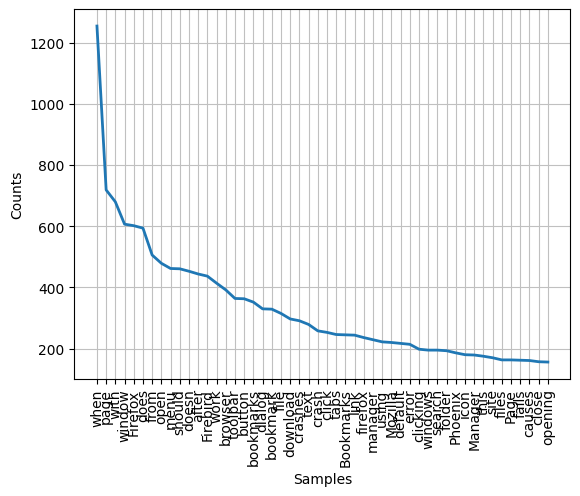

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

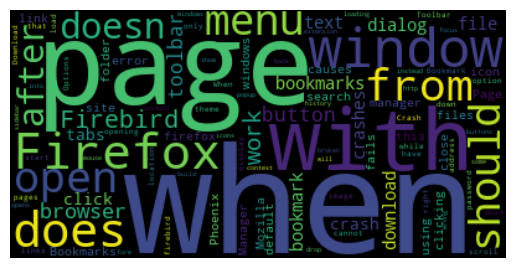

In [ ]:
#install library
# !pip install wordcloud
#build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

**Bài tập: Haỹ vẻ đám mây từ sau khi xóa từ dừng**

In [ ]:
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

In [ ]:
# import pandas as pd
df = pd.DataFrame({'Headline':wt_words})
print(df)

       Headline
0        Cookie
1       Manager
2             :
3             "
4           Don
...         ...
102452     does
102453      not
102454   remove
102455      jar
102456     file

[102457 rows x 1 columns]


In [ ]:
# nltk.download('stopwords')
# from nltk.corpus import stopwords
#remove stop words
# stop = stopwords.words('english')
df['Headline'] = df['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
df['Headline']

0          Cookie
1         Manager
2               :
3               "
4             Don
           ...   
102452           
102453           
102454     remove
102455        jar
102456       file
Name: Headline, Length: 102457, dtype: object

In [ ]:
frequency_dist = nltk.FreqDist(df['Headline'])
frequency_dist

FreqDist({'': 26303, '.': 2428, '"': 1971, "'": 1507, '-': 1372, '(': 770, 'page': 719, ')': 645, 'window': 607, 'Firefox': 602, ...})

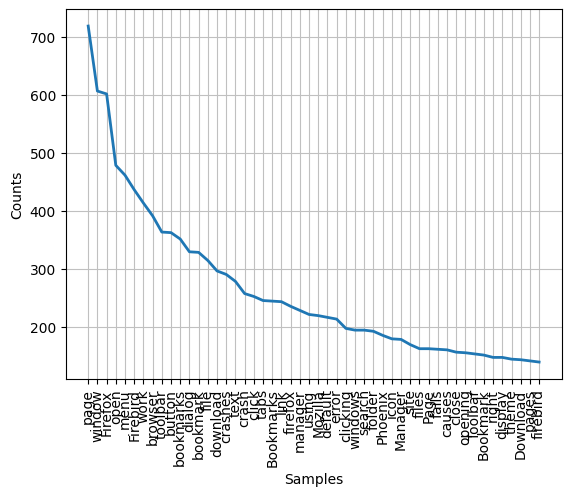

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)

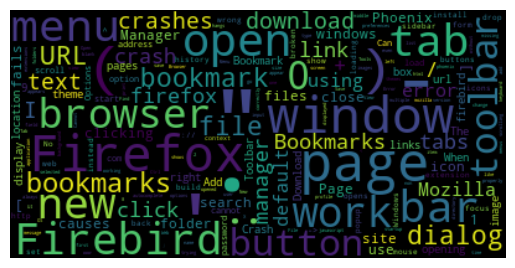

In [ ]:
#install library
# !pip install wordcloud
#build wordcloud
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

In [ ]:
print(df['Content'])

KeyError: 'content'

In [ ]:
filename = 'clean.csv'
newData = df['Headline']
newData.to_csv(filename, index=False)